In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Coursera.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [4]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [5]:
data.shape

(3522, 7)

In [6]:
data.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [7]:
data.duplicated().sum()

98

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data['Course Description'].value_counts()

Course Description
This specialization offers the latest developments in blockchain technology through a highly engaging learning experience with animated video components and intuitive course flow to maximize your knowledge retention.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [10]:
data['Course Name'].value_counts()

Course Name
Corporate Strategy                                        2
Introduction to Psychology                                2
Cryptography                                              2
Portfolio and Risk Management                             2
Python Data Structures                                    2
                                                         ..
Symmetric Cryptography                                    1
Using Descriptive Statistics to Analyze Data in R         1
BIM Fundamentals for Engineers                            1
Organizational Behavior: How to Manage People             1
Architecting with Google Kubernetes Engine: Production    1
Name: count, Length: 3416, dtype: int64

In [11]:
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: count, dtype: int64

In [12]:
data['Course Rating'].value_counts()

Course Rating
4.7               707
4.6               602
4.8               585
4.5               380
4.4               235
4.9               174
4.3               159
4.2               120
5                  89
4.1                85
Not Calibrated     82
4                  50
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: count, dtype: int64

In [13]:
data = data[data['Course Rating'] != 'Not Calibrated']
data['Course Rating'].value_counts()

Course Rating
4.7    707
4.6    602
4.8    585
4.5    380
4.4    235
4.9    174
4.3    159
4.2    120
5       89
4.1     85
4       50
3.8     24
3.9     20
3.7     18
3.6     18
3.5     17
3.4     13
3       12
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
1        2
2        1
3.1      1
2.5      1
1.9      1
2.3      1
Name: count, dtype: int64

In [14]:
data = data[data['Difficulty Level'] != 'Not Calibrated']
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner        1387
Advanced         955
Intermediate     809
Conversant       143
Name: count, dtype: int64

In [15]:
import re
data = data[data['Course Rating']!='Not Calibrated']
data['Course Rating'] = data['Course Rating'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else 0.0)
data['Course Rating'].value_counts()

Course Rating
4.7    696
4.6    588
4.8    579
4.5    377
4.4    231
4.9    172
4.3    153
0.0    153
4.2    119
4.1     85
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
3.1      1
2.5      1
1.9      1
2.3      1
Name: count, dtype: int64

In [16]:
data['Category'] = data['Course Description'].apply(lambda x: 'Film and Cinema Studies' if any(keyword in x.lower() for keyword in ['film', 'cinema', 'movie', 'director', 'screenplay']) else
                                                    'Stock Market Investing' if any(keyword in x.lower() for keyword in ['stock market', 'investing', 'financial market', 'trading', 'stocks']) else
                                                    'Financial Analysis' if any(keyword in x.lower() for keyword in ['financial analysis', 'financial modeling', 'financial planning']) else
                                                    'Real Estate Investment' if any(keyword in x.lower() for keyword in ['real estate', 'investment property', 'real estate finance']) else
                                                    'Cryptocurrency' if any(keyword in x.lower() for keyword in ['cryptocurrency', 'blockchain', 'bitcoin', 'ethereum']) else
                                                    'Social Media Marketing' if any(keyword in x.lower() for keyword in ['social media', 'marketing', 'digital marketing', 'social media strategy']) else
                                                    'Public Speaking' if any(keyword in x.lower() for keyword in ['public speaking', 'communication skills', 'presentation']) else
                                                    'Creative Writing' if any(keyword in x.lower() for keyword in ['creative writing', 'fiction writing', 'poetry', 'storytelling']) else
                                                    'Animation' if any(keyword in x.lower() for keyword in ['animation', 'cartooning', '3d animation', 'motion graphics']) else
                                                    'Business Analytics' if any(keyword in x.lower() for keyword in ['business analytics', 'data analysis', 'business intelligence', 'data visualization']) else
                                                    'Data Analytics' if any(keyword in x.lower() for keyword in ['data', 'sql', 'data science', 'data engineering', 'big data']) else
                                                    'ML/DL' if any(keyword in x.lower() for keyword in ['machine learning', 'deep learning', 'neural network', 'tensorflow', 'pytorch']) else
                                                    'Photography' if any(keyword in x.lower() for keyword in ['photography', 'photo editing', 'portrait photography', 'landscape photography']) else
                                                    'Astronomy' if any(keyword in x.lower() for keyword in ['astronomy', 'cosmology', 'space science', 'telescope']) else
                                                    'Philosophy' if any(keyword in x.lower() for keyword in ['philosophy', 'philosophical thought', 'ethical philosophy']) else
                                                    'Game Development' if any(keyword in x.lower() for keyword in ['game development', 'game design', 'video game programming']) else
                                                    '3D Modeling' if any(keyword in x.lower() for keyword in ['3d modeling', '3d design', '3d animation']) else
                                                    'Culinary Arts' if any(keyword in x.lower() for keyword in ['culinary arts', 'cooking techniques', 'baking']) else
                                                    'Political Science' if any(keyword in x.lower() for keyword in ['political science', 'government', 'international relations']) else
                                                    'Linguistics' if any(keyword in x.lower() for keyword in ['linguistics', 'language studies', 'language structure']) else
                                                    'Fitness Training' if any(keyword in x.lower() for keyword in ['fitness training', 'exercise', 'personal training']) else
                                                    'Digital Marketing' if any(keyword in x.lower() for keyword in ['digital marketing', 'online marketing', 'internet advertising']) else
                                                    'Photography' if any(keyword in x.lower() for keyword in ['photography', 'photo editing', 'portrait photography', 'landscape photography']) else
                                                    'Economics' if any(keyword in x.lower() for keyword in ['economics', 'microeconomics', 'macroeconomics']) else
                                                    'History' if any(keyword in x.lower() for keyword in ['history', 'historical studies', 'world history']) else
                                                    'Music' if any(keyword in x.lower() for keyword in ['music', 'music theory', 'musical composition']) else
                                                    'Language Learning' if any(keyword in x.lower() for keyword in ['language learning', 'language acquisition', 'linguistic studies']) else
                                                    'Health and Wellness' if any(keyword in x.lower() for keyword in ['health', 'wellness', 'fitness']) else
                                                    'Engineering' if any(keyword in x.lower() for keyword in ['engineering', 'civil engineering', 'electrical engineering']) else
                                                    'Design' if any(keyword in x.lower() for keyword in ['design', 'graphic design', 'ux/ui design']) else
                                                    'Literature and Writing' if any(keyword in x.lower() for keyword in ['literature', 'writing', 'creative writing']) else
                                                    'Science' if any(keyword in x.lower() for keyword in ['science', 'physics', 'chemistry']) else
                                                    'Technology' if any(keyword in x.lower() for keyword in ['technology', 'computer science', 'programming']) else
                                                    'Mathematics' if any(keyword in x.lower() for keyword in ['mathematics', 'calculus', 'algebra']) else
                                                    'Language and Communication' if any(keyword in x.lower() for keyword in ['language', 'communication', 'linguistics']) else
                                                    'Other' if any(keyword in x.lower() for keyword in ['other', 'miscellaneous', 'varied', 'diverse', 'assorted', 'various', 'general']) else 'Other')


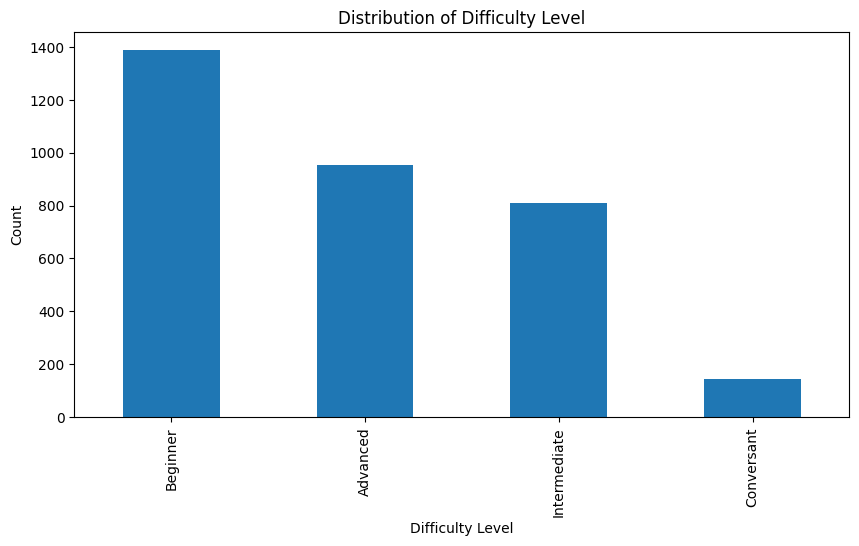

In [17]:
# Plotting the distribution of difficulty level
plt.figure(figsize=(10,5))
plt.title('Distribution of Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
data['Difficulty Level'].value_counts().plot(kind='bar')
plt.show()

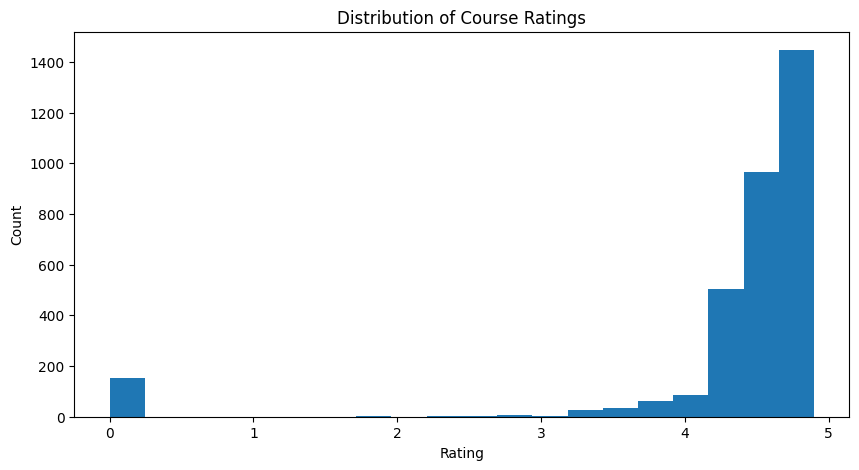

In [18]:
plt.figure(figsize=(10,5))
plt.hist(data['Course Rating'],bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [20]:
features = tfidf.fit_transform(data['Course Description']+data['Course Name']+data['Skills'])

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_courses(user_input):
    # Preprocess user input
    preprocessed_input = tfidf.transform([user_input])

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(preprocessed_input, features)

    # Get indices of top recommended courses
    top_indices = similarity_scores.argsort()[0][::-1][:5]

    # Get recommended courses
    recommended_courses = data.iloc[top_indices][['Course Name','Course Description','Difficulty Level','Course Rating','Skills']]

    return pd.DataFrame(recommended_courses)


In [24]:
user = input('Enter your course description, name or skills: ')
rec = recommend_courses(user)
rec.head()

,Course Name,Course Description,Difficulty Level,Course Rating,Skills
2538,Introduction to Applied Machine Learning,This course is for professionals who have hear...,Intermediate,4.7,Algorithms Machine Learning Algorithms Appli...
2707,Machine Learning for Data Analysis,Are you interested in predicting future outcom...,Intermediate,4.2,Algorithms Data Analysis numbers (spreadshee...
3471,Optimizing Machine Learning Performance,This course synthesizes everything your have l...,Beginner,4.5,project Deep Learning Strategy mathematical...
3321,Machine Learning Foundations: A Case Study App...,Do you have data and wonder what it can tell y...,Conversant,4.5,Human Learning Regression Machine Learning ...
3230,Machine Learning for All,"Machine Learning, often called Artificial Inte...",Conversant,4.7,robotics Machine Learning Artificial Neural ...
